# Pymaceuticals Inc.
---

### Analysis

- From the available drug treatments, Ramicane and Capomulin were most effective in reducing the size of tumors compared to the other drugs.
- Ketapril was the least effective treatment with the highest mean tumor volume. 
- The total count of mice by gender also showed that 124 female mice and 125 male mice.
- The correlation between the mouse weight and the average tumor volume is 0.84 which is a strong positive correlation. This shows that when the mouse weight increases; the average tumor volume also increases. The heavier the mouse; the less effective the drug.

 

In [160]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [161]:
# Study data files
mouse_metadata_path = "C:/Users/44739/Desktop/data/Mouse_metadata.csv"
study_results_path = "C:/Users/44739/Desktop/data/Study_results.csv"

In [162]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [163]:
# Checking the number of mice.
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count


249

In [164]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [165]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [166]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df[combined_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [167]:
# Checking the number of mice in the clean DataFrame.
mouse_count_two = len(clean_df["Mouse ID"].unique())
mouse_count_two

248

## Summary Statistics

In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Vol.":mean, 
                            "Median Tumor Vol.":median, 
                           "Tumor Vol. Variance":var, 
                           "Tumor Vol. Std. Dev.":std, 
                           "Tumor Vol. SEM":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats_df


,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Std. Dev.,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
clean_df.groupby("Drug Regimen").agg(agg_summary)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [170]:
#Count the number of data points for mice per treatment
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

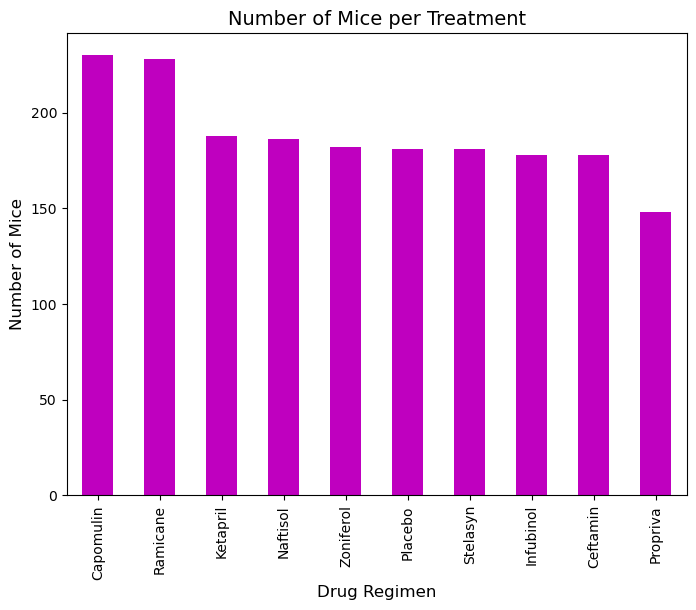

In [171]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

plot_pandas = mice_count.plot.bar(figsize=(8,6), color='m',fontsize = 10)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment",fontsize = 14)
plt.show()


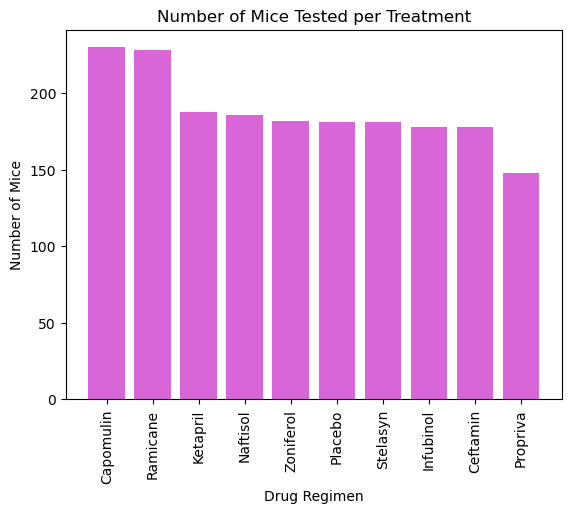

In [172]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='m', alpha=0.6, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")


plt.show()

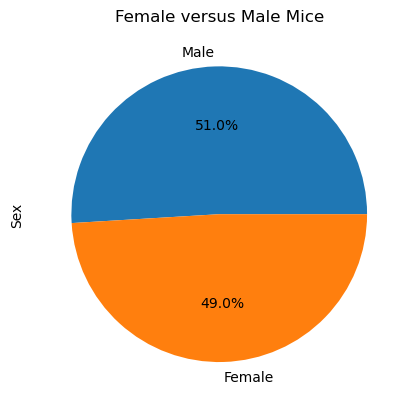

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_data = clean_df["Sex"].value_counts()
plt.title("Female versus Male Mice")
mice_gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

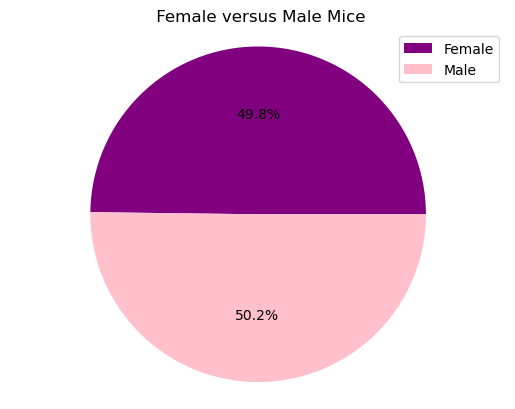

In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
label_sizes = [49.7999197, 50.200803]
colors = ["purple","pink"]
plt.pie(label_sizes, colors=colors,
        autopct="%1.1f%%")
plt.title(' Female versus Male Mice')
plt.axis("equal")
plt.legend(labels, loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [185]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_df.groupby("Mouse ID")
greatest_timepoint=greatest_timepoint["Timepoint"].max()
greatest_timepoint_df=pd.DataFrame(greatest_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_tumor_df=pd.merge(greatest_timepoint_df, clean_df, on = ["Mouse ID", "Timepoint"])
volume_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_tumor = []
volume_tumor=[volume_tumor_capomulin, volume_tumor_ramicane, volume_tumor_infubinol, volume_tumor_ceftamin]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset 
# Determine outliers using upper and lower bounds


for e in range(len(volume_tumor_df)-1):
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Capomulin":
        volume_tumor_capomulin.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Ramicane":
        volume_tumor_ramicane.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Infubinol":
        volume_tumor_infubinol.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])
    if volume_tumor_df.loc[e, "Drug Regimen"] == "Ceftamin":
        volume_tumor_ceftamin.append(volume_tumor_df.loc[e, "Tumor Volume (mm3)"])

outlier = []
for e in range(len(volume_tumor)):
# Copied below data and syntaxes from matplotlib class day 3, activity 2
    quartiles = pd.Series(volume_tumor[e]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[e]}:")

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
      
for i in range(len(volume_tumor[e])):
    if (volume_tumor[e][i] < lower_bound) or (volume_tumor[e][i] > upper_bound):
        the_outlier = volume_tumor[e][i]
        outlier.append(the_outlier)
        print(f"The outliers are {outlier}.") 



Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumor volum

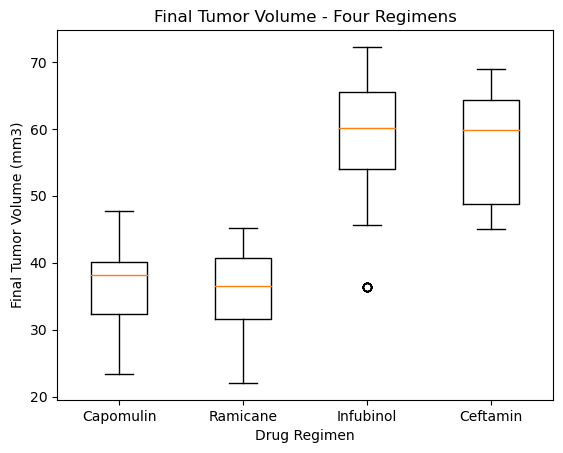

In [187]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume - Four Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(volume_tumor)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

In [188]:
# lsit of mice treated with Capomulin
volume_tumor_df.loc[volume_tumor_df["Drug Regimen"] == "Capomulin"].head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


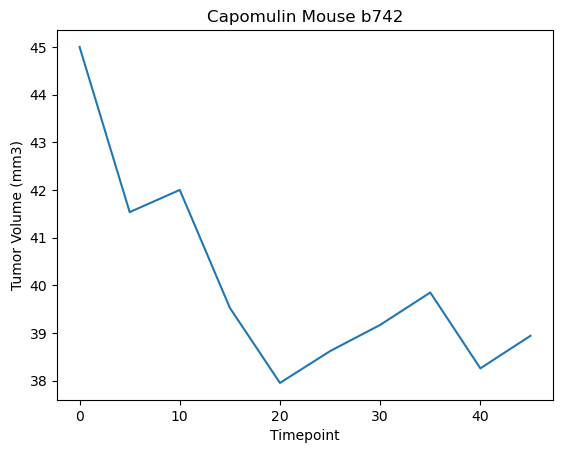

In [189]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
def line_plot(regimen, mouse_id):
    regimen_plot = clean_df.loc[clean_df["Drug Regimen"] == regimen]
    id_data = regimen_plot.loc[regimen_plot["Mouse ID"] == mouse_id]
    plt.plot(id_data["Timepoint"], id_data["Tumor Volume (mm3)"])
    plt.xlabel("Timepoint")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title(regimen + " Mouse " + mouse_id)
    plt.show()
line_plot("Capomulin", "b742")

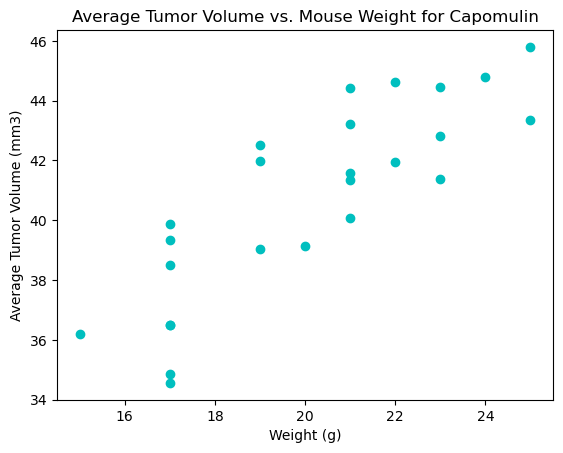

In [190]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_plot_df=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
capomulin_avg=capomulin_plot_df["Tumor Volume (mm3)"].mean()
mouse_weight=capomulin_plot_df["Weight (g)"].unique()
plt.scatter(mouse_weight,capomulin_avg, color="c")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor volume is 0.84.


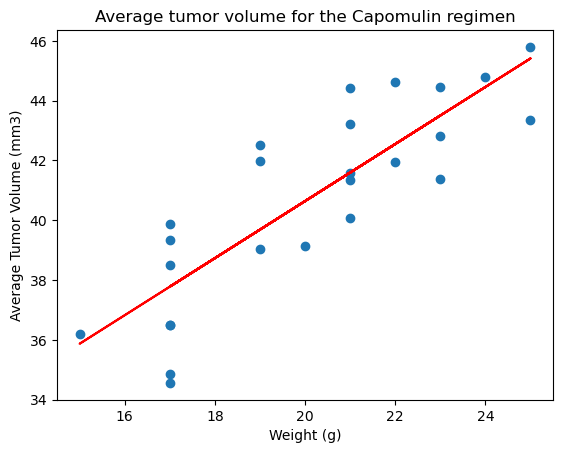

In [191]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, capomulin_avg)

x= mouse_weight
y= capomulin_avg

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, capomulin_avg)
plt.plot(mouse_weight, regress_values, "r-")
plt.title("Average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between the mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()